# Homework 1: Python Fundamentals & Plotting


## Rules and style (required)
- Use **double quotes** for strings.
- Add **type hints** for variables and functions.
- Do **not** import extra packages beyond what is shown.
- Write clean code with helpful names and short comments.


In [ ]:
# Setup (run this cell first)
from __future__ import annotations

from pathlib import Path
from typing import Any, Dict, List, Tuple
import numpy as np

# Example data for tasks
ints: List[int] = list(range(1, 21))  # 1..20
arr: np.ndarray = np.arange(30).reshape(5, 6)  # 5x6 array: 0..29

roster: List[str] = ["Ada", "Grace", "Katherine", "Edsger", "Donald", "Barbara"]
scores_quiz1: List[int] = [9, 10, 8, 7, 9, 10]
scores_quiz2: List[int] = [10, 9, 9, 8, 9, 10]

catalog: Dict[str, Dict[str, Any]] = {
    "sensor_A": {"meta": {"id": "A-001", "room": "R1"}, "readings": [0.2, 0.3, 0.5]},
    "sensor_B": {"meta": {"id": "B-101", "room": "R2"}, "readings": [1.1, 1.0, 0.9]},
    "sensor_C": {"meta": {"id": "C-087", "room": "R1"}, "readings": [5.0, 4.8, 5.1]},
}

# A small workspace under the Colab working dir
workspace: Path = Path.cwd() / "hw_fs_workspace"
workspace.mkdir(exist_ok=True)
# Create some files
for i in range(3):
    p: Path = workspace / f"sample_{i}.txt"
    p.write_text(f"file_index={i}\n" + "\n".join(f"value={j}" for j in range(3)))
# And a subdir
sub: Path = workspace / "nested"
sub.mkdir(exist_ok=True)
(sub / "notes.txt").write_text("nested file\nline=42\n")

print("Setup done.")
print("workspace:", workspace)
print("files:", sorted(x.name for x in workspace.iterdir()))


Setup done.
workspace: /content/hw_fs_workspace
files: ['nested', 'sample_0.txt', 'sample_1.txt', 'sample_2.txt']


## Problem 1 — Slicing lists

**1A.** Write a function that returns every third element of a list, starting at index 1.

```python
def every_third_from_one(xs: List[int]) -> List[int]:
    ...
```

- Use slicing only (no loops).
- Test on `ints`.

**1B.** Return the last **five** numbers of `ints` in **reverse** order using **one** slice.

```python
def last_five_reversed(xs: List[int]) -> List[int]:
    ...
```

**1C.** Given `roster`, return a new list with the **middle four** names (indices 1..4). Do not mutate `roster`.

```python
def middle_four(names: List[str]) -> List[str]:
    ...
```


In [ ]:
def every_third_from_one(xs: List[int]) -> List[int]:
    return xs[1::3]

def last_five_reversed(xs: List[int]) -> List[int]:
    return xs[:-6:-1]

def middle_four(names: List[str]) -> List[str]:
    return names[1:5]

In [ ]:
# Self-checks for Problem 1 (uncomment after implementing)
print("1A:", every_third_from_one(ints))      # expect [2, 5, 8, 11, 14, 17, 20]
print("1B:", last_five_reversed(ints))        # expect [20, 19, 18, 17, 16]
print("1C:", middle_four(roster))             # expect ['Grace', 'Katherine', 'Edsger', 'Donald']


1A: [2, 5, 8, 11, 14, 17, 20]
1B: [20, 19, 18, 17, 16]
1C: ['Grace', 'Katherine', 'Edsger', 'Donald']


## Problem 2 — Slicing NumPy arrays

Use slicing only (no loops).

**2A.** From `arr` (shape 5×6), select a **2×3** block that starts at row 1, col 2.

```python
def block_2x3(a: np.ndarray) -> np.ndarray:
    ...
```

**2B.** Return the last column of `arr` as a **1D** array.

```python
def last_col_flat(a: np.ndarray) -> np.ndarray:
    ...
```

**2C.** Return every other row of `arr`, and within those rows, every other column.

```python
def stride_rows_cols(a: np.ndarray) -> np.ndarray:
    ...
```


In [ ]:
def block_2x3(a: np.ndarray) -> np.ndarray:
    return a[1:3, 2:5]

def last_col_flat(a: np.ndarray) -> np.ndarray:
    return a[:, -1]

def stride_rows_cols(a: np.ndarray) -> np.ndarray:
    return a[::2, ::2]

In [ ]:
# Self-checks for Problem 2
print("2A:\n", block_2x3(arr))       # expect [[8, 9, 10],[14, 15, 16]]
print("2B:",   last_col_flat(arr))   # expect [5, 11, 17, 23, 29]
print("2C shape:", stride_rows_cols(arr).shape)  # expect (3, 3)


2A:
 [[ 8  9 10]
 [14 15 16]]
2B: [ 5 11 17 23 29]
2C shape: (3, 3)


## Problem 3 — Dictionaries and nested dictionaries

**3A.** Write a function that returns a list of all sensor IDs from `catalog` (the `"id"` under `"meta"`), in **sorted** order.

```python
def all_sensor_ids(db: Dict[str, Dict[str, Any]]) -> List[str]:
    ...
```

**3B.** Return the average reading for a given sensor key (e.g., `"sensor_B"`). Raise a `KeyError` with a clear message if the sensor key is missing.

```python
def avg_reading(db: Dict[str, Dict[str, Any]], key: str) -> float:
    ...
```

**3C.** Return a dictionary that maps **room** (e.g., `"R1"`) to the **count** of sensors in that room.

```python
def room_counts(db: Dict[str, Dict[str, Any]]) -> Dict[str, int]:
    ...
```


In [ ]:
from typing import Dict

def all_sensor_ids(db: Dict[str, Dict[str, Any]]) -> List[str]:
    ids = [sensor["meta"]["id"] for sensor in db.values()]
    return sorted(ids)

def avg_reading(db: Dict[str, Dict[str, Any]], key: str) -> float:
    if key not in db:
        raise KeyError(f"Sensor '{key}' not found in database")
    readings = db[key]["readings"]
    return sum(readings) / len(readings)

def room_counts(db: Dict[str, Dict[str, Any]]) -> Dict[str, int]:
    counts = {}
    for sensor in db.values():
        room = sensor["meta"]["room"]
        counts[room] = counts.get(room, 0) + 1
    return counts

In [ ]:
# Self-checks for Problem 3
print("3A:", all_sensor_ids(catalog))     # expect ['A-001','B-101','C-087']
print("3B:", f"{avg_reading(catalog, 'sensor_B'):.2f}")  # expect 1.00
print("3C:", room_counts(catalog))        # expect {'R1': 2, 'R2': 1}


3A: ['A-001', 'B-101', 'C-087']
3B: 1.00
3C: {'R1': 2, 'R2': 1}


## Problem 4 — `enumerate()` and `zip()`

**4A.** Using `enumerate()`, return a list of tuples `(index, name)` for names in `roster` where the index is **odd**.

```python
def odd_indexed(names: List[str]) -> List[Tuple[int, str]]:
    ...
```

**4B.** Using `zip()`, compute the **per-student average** of `scores_quiz1` and `scores_quiz2` and return a dict mapping `name -> avg`.

```python
def per_student_average(
    names: List[str], q1: List[int], q2: List[int]
) -> Dict[str, float]:
    ...
```

**4C.** Using **both** `enumerate()` and `zip()`, produce a list of strings like  
`"2: Katherine -> 8.5"` where the prefix is the index (0-based), then name, then average to one decimal place.

```python
def indexed_report(
    names: List[str], q1: List[int], q2: List[int]
) -> List[str]:
    ...
```


In [ ]:
from typing import Tuple

def odd_indexed(names: List[str]) -> List[Tuple[int, str]]:
    return [(i, name) for i, name in enumerate(names) if i % 2 == 1]

def per_student_average(
    names: List[str], q1: List[int], q2: List[int]
) -> Dict[str, float]:
    return {name: (score1 + score2) / 2 for name, score1, score2 in zip(names, q1, q2)}

def indexed_report(
    names: List[str], q1: List[int], q2: List[int]
) -> List[str]:
    result = []
    for i, (name, score1, score2) in enumerate(zip(names, q1, q2)):
        avg = (score1 + score2) / 2
        result.append(f"{i}: {name} -> {avg:.1f}")
    return result

In [ ]:
# Self-checks for Problem 4
print("4A:", odd_indexed(roster))  # expect [(1,'Grace'), (3,'Edsger'), (5,'Barbara')]
print("4B:", per_student_average(roster, scores_quiz1, scores_quiz2))
print("4C:", indexed_report(roster, scores_quiz1, scores_quiz2))


4A: [(1, 'Grace'), (3, 'Edsger'), (5, 'Barbara')]
4B: {'Ada': 9.5, 'Grace': 9.5, 'Katherine': 8.5, 'Edsger': 7.5, 'Donald': 9.0, 'Barbara': 10.0}
4C: ['0: Ada -> 9.5', '1: Grace -> 9.5', '2: Katherine -> 8.5', '3: Edsger -> 7.5', '4: Donald -> 9.0', '5: Barbara -> 10.0']


## Problem 5 — `pathlib` directory work

Use **only** `pathlib` methods and properties (no `os`).

**5A.** Write a function that returns all **`.txt`** files in `workspace` (non-recursive), as a list of `Path` objects sorted by name.

```python
def list_txt_nonrecursive(root: Path) -> List[Path]:
    ...
```

**5B.** Write a function that returns all `.txt` files **recursively** under `workspace` (including subfolders), sorted by **relative path** to `root`.

```python
def list_txt_recursive(root: Path) -> List[Path]:
    ...
```

**5C.** Write a function that reads each `.txt` file **in `root` only** and returns a dict mapping `filename -> first_line` (without newline). If a file is empty, map to `""`.

```python
def filename_to_first_line(root: Path) -> Dict[str, str]:
    ...
```

**5D.** Write a function that creates a new folder `workspace/outputs` and writes a report file `summary.txt` with two lines:
1) number of `.txt` files found recursively  
2) the name of the lexicographically first `.txt` file (relative to `root`), or `"NONE"` if none

Return the `Path` to `summary.txt`.

```python
def write_summary(root: Path) -> Path:
    ...
```


In [ ]:
from typing import Dict

def list_txt_nonrecursive(root: Path) -> List[Path]:
    txt_files = [f for f in root.iterdir()
    if f.is_file() and f.suffix == ".txt"]
    return sorted(txt_files, key=lambda x: x.name)

def list_txt_recursive(root: Path) -> List[Path]:
    txt_files = [f for f in root.rglob("*.txt")
    if f.is_file()]
    return sorted(txt_files, key=lambda x: x.relative_to(root))

def filename_to_first_line(root: Path) -> Dict[str, str]:
    result = {}
    for file_path in root.iterdir():
        if file_path.is_file() and file_path.suffix == ".txt":
            try:
                first_line = file_path.read_text().splitlines()[0]
            except (IndexError, IOError):
                first_line = ""
            result[file_path.name] = first_line
    return result

def write_summary(root: Path) -> Path:
    output_dir = root / "outputs"
    output_dir.mkdir(exist_ok=True)
    txt_files = list_txt_recursive(root)
    count = len(txt_files)
    first_file = txt_files[0].relative_to(root) if txt_files else "NONE"
    summary_path = output_dir / "summary.txt"
    summary_path.write_text(f"{count}\n{first_file}")

    return summary_path

In [ ]:
# Self-checks for Problem 5
print("5A:", [p.name for p in list_txt_nonrecursive(workspace)])
print("5B:", [str(p.relative_to(workspace)) for p in list_txt_recursive(workspace)])
print("5C:", filename_to_first_line(workspace))
print("5D:", write_summary(workspace))


5A: ['sample_0.txt', 'sample_1.txt', 'sample_2.txt']
5B: ['nested/notes.txt', 'outputs/summary.txt', 'sample_0.txt', 'sample_1.txt', 'sample_2.txt']
5C: {'sample_0.txt': 'file_index=0', 'sample_1.txt': 'file_index=1', 'sample_2.txt': 'file_index=2'}
5D: /content/hw_fs_workspace/outputs/summary.txt


# Problem 6 – Visualizing data

For this problem, we'll be working with the dataset from [Data-Driven Review of Thermoelectric Materials: Performance and Resource Considerations](https://doi.org/10.1021/cm400893e). This dataset can be accessed through `matminer`s `load_dataset()` function with the argument `"ucsb_thermoelectrics"`. A description of the dataset's features can be found at the docs page: [https://hackingmaterials.lbl.gov/matminer/dataset_summary.html#ucsb-thermoelectrics](https://hackingmaterials.lbl.gov/matminer/dataset_summary.html#ucsb-thermoelectrics)

1. Install `matminer` from `pip`, and perform the necessary imports.
2. Plot the following 4 features in one plot in the way that you deem to be most appropriate: crystallinity, electrical resistivity, thermoelectric figure of merit, Seebeck coefficient. Show your initial dataset exploration as well.
3. Make a plot to show the relationship between sample crystallinity and the range of associated thermoelectric power factors.

Loading UCSB thermoelectrics dataset...
Dataset shape: (1093, 12)

All columns: ['composition', 'crystallinity', 'synthesis', 'spacegroup', 'rho (ohm.cm)', 'S [muV/K]', 'PF [W/mK^2]', 'zT', 'kappa [W/mK]', 'sigma [S/cm]', 'T [K]', 'src']

First few rows:
        composition    crystallinity                         synthesis  \
1  Ti0.99Nb0.01NiSn  Polycrystalline                Arc-melted, vacuum   
2          Cu1.98Se  Polycrystalline                    Melted, vacuum   
3            Bi2Te3   Single crystal                            Melted   
4        Cr1.3Mo6S8  Polycrystalline      Solid state reaction, vacuum   
5            LaNiO3  Polycrystalline  Evaporate nitrates (1173 K, air)   

   spacegroup  rho (ohm.cm)  S [muV/K]  PF [W/mK^2]        zT  kappa [W/mK]  \
1       216.0      0.001240   -192.458     0.002987  0.203822      5.861700   
2       225.0      0.003250    201.500     0.001249  1.230837      1.015000   
3       166.0      0.000450   -174.000     0.006728  0.502500  

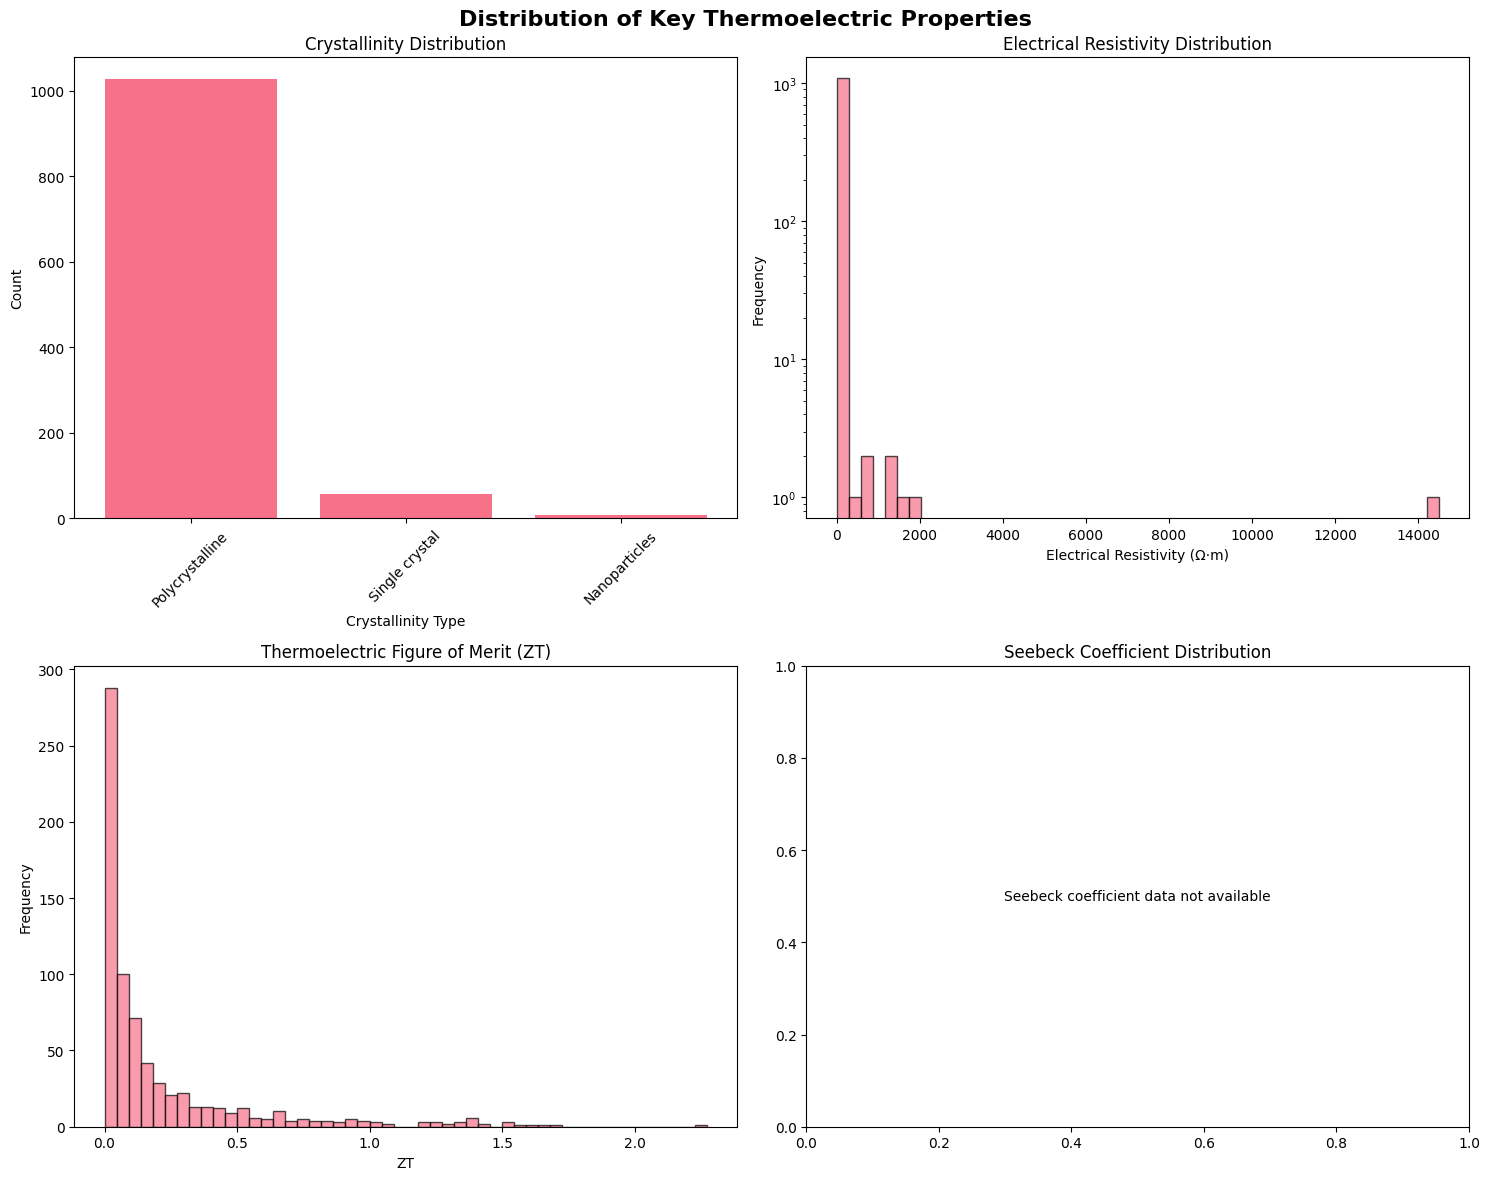

Required columns (crystallinity and/or power factor) not available for relationship analysis


In [ ]:
#Got help from ChatGPT

# First install matminer if not already installed
!pip install matminer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matminer.datasets import load_dataset

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
print("Loading UCSB thermoelectrics dataset...")
df = load_dataset("ucsb_thermoelectrics")

# First, let's examine the actual column names
print(f"Dataset shape: {df.shape}")
print(f"\nAll columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# Let's find the correct column names by searching for relevant terms
print("\nSearching for relevant columns...")
all_columns = df.columns.tolist()

# Find columns related to our features
crystallinity_cols = [col for col in all_columns if 'crystal' in col.lower()]
resistivity_cols = [col for col in all_columns if 'resist' in col.lower() or 'rho' in col.lower()]
zt_cols = [col for col in all_columns if 'zt' in col.lower() or 'figure of merit' in col.lower()]
seebeck_cols = [col for col in all_columns if 'seebeck' in col.lower()]
power_factor_cols = [col for col in all_columns if 'power' in col.lower() and 'factor' in col.lower()]

print(f"Crystallinity columns: {crystallinity_cols}")
print(f"Resistivity columns: {resistivity_cols}")
print(f"ZT columns: {zt_cols}")
print(f"Seebeck columns: {seebeck_cols}")
print(f"Power factor columns: {power_factor_cols}")

# Based on the actual column names, let's map them
# (These might need adjustment based on what we find)
crystallinity_col = crystallinity_cols[0] if crystallinity_cols else None
resistivity_col = resistivity_cols[0] if resistivity_cols else None
zt_col = zt_cols[0] if zt_cols else None
seebeck_col = seebeck_cols[0] if seebeck_cols else None
power_factor_col = power_factor_cols[0] if power_factor_cols else None

print(f"\nUsing columns:")
print(f"Crystallinity: {crystallinity_col}")
print(f"Resistivity: {resistivity_col}")
print(f"ZT: {zt_col}")
print(f"Seebeck: {seebeck_col}")
print(f"Power factor: {power_factor_col}")

# Initial dataset exploration
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# Display basic statistics for the features of interest
features_of_interest = [crystallinity_col, resistivity_col, zt_col, seebeck_col, power_factor_col]
features_of_interest = [f for f in features_of_interest if f is not None]

print(f"\nBasic statistics for features of interest:")
print(df[features_of_interest].describe())

# Check unique values for crystallinity
if crystallinity_col:
    print(f"\nUnique crystallinity values: {df[crystallinity_col].unique()}")

# Create a 2x2 grid of subplots for the four features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Thermoelectric Properties', fontsize=16, fontweight='bold')

# Plot 1: Crystallinity (categorical data)
if crystallinity_col:
    crystallinity_counts = df[crystallinity_col].value_counts()
    axes[0, 0].bar(range(len(crystallinity_counts)), crystallinity_counts.values)
    axes[0, 0].set_title('Crystallinity Distribution')
    axes[0, 0].set_xlabel('Crystallinity Type')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_xticks(range(len(crystallinity_counts)))
    axes[0, 0].set_xticklabels(crystallinity_counts.index, rotation=45)
else:
    axes[0, 0].text(0.5, 0.5, 'Crystallinity data not available',
                   ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Crystallinity Distribution')

# Plot 2: Electrical Resistivity (log scale due to wide range)
if resistivity_col:
    resistivity_data = df[resistivity_col].dropna()
    if len(resistivity_data) > 0:
        axes[0, 1].hist(resistivity_data, bins=50, alpha=0.7, edgecolor='black')
        axes[0, 1].set_title('Electrical Resistivity Distribution')
        axes[0, 1].set_xlabel('Electrical Resistivity (Ω·m)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_yscale('log')
    else:
        axes[0, 1].text(0.5, 0.5, 'No resistivity data',
                       ha='center', va='center', transform=axes[0, 1].transAxes)
else:
    axes[0, 1].text(0.5, 0.5, 'Electrical resistivity data not available',
                   ha='center', va='center', transform=axes[0, 1].transAxes)
axes[0, 1].set_title('Electrical Resistivity Distribution')

# Plot 3: Thermoelectric Figure of Merit (ZT)
if zt_col:
    zt_data = df[zt_col].dropna()
    if len(zt_data) > 0:
        axes[1, 0].hist(zt_data, bins=50, alpha=0.7, edgecolor='black')
        axes[1, 0].set_title('Thermoelectric Figure of Merit (ZT)')
        axes[1, 0].set_xlabel('ZT')
        axes[1, 0].set_ylabel('Frequency')
    else:
        axes[1, 0].text(0.5, 0.5, 'No ZT data',
                       ha='center', va='center', transform=axes[1, 0].transAxes)
else:
    axes[1, 0].text(0.5, 0.5, 'ZT data not available',
                   ha='center', va='center', transform=axes[1, 0].transAxes)
axes[1, 0].set_title('Thermoelectric Figure of Merit (ZT)')

# Plot 4: Seebeck Coefficient
if seebeck_col:
    seebeck_data = df[seebeck_col].dropna()
    if len(seebeck_data) > 0:
        axes[1, 1].hist(seebeck_data, bins=50, alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('Seebeck Coefficient Distribution')
        axes[1, 1].set_xlabel('Seebeck Coefficient (μV/K)')
        axes[1, 1].set_ylabel('Frequency')
    else:
        axes[1, 1].text(0.5, 0.5, 'No Seebeck data',
                       ha='center', va='center', transform=axes[1, 1].transAxes)
else:
    axes[1, 1].text(0.5, 0.5, 'Seebeck coefficient data not available',
                   ha='center', va='center', transform=axes[1, 1].transAxes)
axes[1, 1].set_title('Seebeck Coefficient Distribution')

plt.tight_layout()
plt.show()

# Create plots for crystallinity vs power factor relationship
if crystallinity_col and power_factor_col:
    # Filter out rows with missing data
    valid_data = df[df[crystallinity_col].notna() & df[power_factor_col].notna()]

    if len(valid_data) > 0:
        plt.figure(figsize=(14, 10))

        # Plot 1: Boxplot of power factor by crystallinity
        plt.subplot(2, 2, 1)
        sns.boxplot(x=crystallinity_col, y=power_factor_col, data=valid_data)
        plt.title('Power Factor Distribution by Crystallinity')
        plt.xlabel('Crystallinity')
        plt.ylabel('Power Factor')
        plt.xticks(rotation=45)
        plt.yscale('log')

        # Plot 2: Range of power factors by crystallinity
        plt.subplot(2, 2, 2)
        crystallinity_groups = valid_data.groupby(crystallinity_col)[power_factor_col]
        power_factor_ranges = crystallinity_groups.max() - crystallinity_groups.min()
        power_factor_ranges.plot(kind='bar', color='lightblue', edgecolor='black')
        plt.title('Range of Power Factor by Crystallinity')
        plt.xlabel('Crystallinity')
        plt.ylabel('Power Factor Range (max - min)')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)

        # Plot 3: Mean power factor by crystallinity
        plt.subplot(2, 2, 3)
        mean_power = valid_data.groupby(crystallinity_col)[power_factor_col].mean()
        mean_power.plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title('Mean Power Factor by Crystallinity')
        plt.xlabel('Crystallinity')
        plt.ylabel('Mean Power Factor')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)

        # Plot 4: Scatter plot with jitter
        plt.subplot(2, 2, 4)
        # Sample data if too large for scatter plot
        if len(valid_data) > 1000:
            plot_data = valid_data.sample(n=1000, random_state=42)
        else:
            plot_data = valid_data

        crystallinity_map = {cryst: i for i, cryst in enumerate(valid_data[crystallinity_col].unique())}
        jitter = np.random.normal(0, 0.1, len(plot_data))

        plt.scatter([crystallinity_map[x] + j for x, j in zip(plot_data[crystallinity_col], jitter)],
                    plot_data[power_factor_col],
                    alpha=0.6, s=30)
        plt.title('Power Factor vs Crystallinity')
        plt.xlabel('Crystallinity Type')
        plt.ylabel('Power Factor')
        plt.xticks(range(len(crystallinity_map)), list(crystallinity_map.keys()), rotation=45)
        plt.yscale('log')
        plt.grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print statistical summary
        print("\nStatistical Summary by Crystallinity:")
        summary = valid_data.groupby(crystallinity_col)[power_factor_col].agg(['count', 'mean', 'std', 'min', 'max'])
        print(summary)

    else:
        print("No valid data for crystallinity vs power factor analysis")
else:
    print("Required columns (crystallinity and/or power factor) not available for relationship analysis")

# Problem 7 – Prompting an LLM
Modern data workflows often use Large Language Models (LLMs) as coding partners. In this problem, you will practice prompt engineering.

**6A**. Choose one function from Problems 1–5 that you found challenging. Write a prompt to an LLM (e.g., ChatGPT, Gemini, Perplexity, Claude) asking for help. Your prompt must:
*   Clearly state the task.
*   Provide the function signature.
*   Provide context about the data.
*   Specify the constraints.

**6B**. Share your **full conversation** (prompts and responses) either as a link or a document.

**6C**. Select a second LLM, submit *exactly the same prompt*, and share the full conversation.

**6D**. Write a short reflection (2–3 sentences):
*   Did the LLM’s answer solve the problem?
*   Was the answer correct and aligned with the requirements?
*   How might you adjust your prompt to improve the response?
*   In what ways were the two LLMs' responses different/similar?